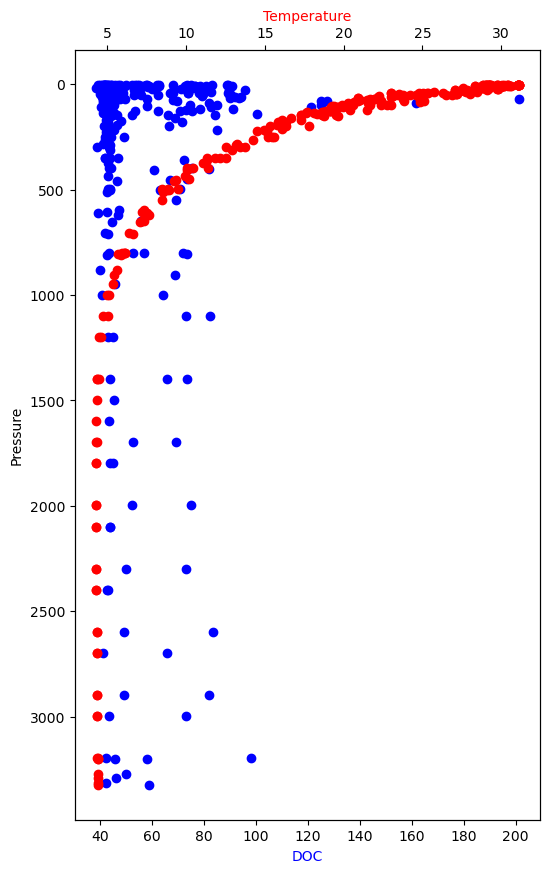

In [37]:
import matplotlib.pyplot as plt

import statsmodels.api as sm

from statsmodels.distributions.mixture_rvs import mixture_rvs

from scipy import stats

DOC = [72.7, 60.6, 55.2, 53.1, 49.6, 45.3, 44.2, 41.4, 43.4, 44.2, 42.9, 47.1, 43.3, 40.7, 43.2, 43.7, 43.4, 43.7, 44.0, 42.7, 65.9, 73.2, 57.9, 50.0, 46.8, 46.7, 44.1, 42.1, 43.2, 43.6, 41.6, 43.4, 41.8, 39.0, 41.8, 43.6, 43.8, 44.7, 71.9, 73.2, 65.6, 52.7, 52.2, 50.0, 49.3, 49.2, 45.7, 46.3, 49.8, 40.2, 44.5, 46.3, 43.7, 44.7, 46.5, 43.2, 44.2, 44.0, 73.6, 69.4, 55.6, 52.6, 45.9, 44.9, 45.3, 45.1, 43.8, 43.1, 41.2, 43.3, 42.1, 42.2, 41.9, 44.9, 41.4, 44.7, 45.9, 74.8, 73.2, 66.0, 49.3, 43.3, 46.8, 75.3, 70.8, 55.9, 56.9, 82.5, 73.3, 69.1, 75.1, 73.1, 83.4, 81.9, 98.2, 58.7, 54.9, 89.4, 89.6, 38.4, 89.6, 82.6, 39.8, 89.8, 94.4, 201.2, 125.1, 127.3, 161.5, 124.9, 121.2, 91.2, 53.6, 100.3, 84.1, 52.4, 68.8, 71.5, 66.5, 85.0, 74.9, 54.1, 62.8, 74.3, 53.0, 74.0, 62.5, 40.9, 57.9, 69.7, 41.2, 82.1, 84.9, 82.7, 78.3, 62.4, 70.6, 75.3, 61.9, 62.6, 56.4, 80.9, 43.9, 73.4, 45.3, 89.23, 90.37, 92.04, 93.65, 89.91, 88.95, 83.01, 90.99, 78.64, 75.96, 80.23, 95.7, 78.02, 67.99, 66.98, 57.73, 58.19, 59.01, 57.19, 58.62, 75.52, 73.86, 74.31, 71.24, 59.93, 52.13, 43.07, 45.66, 45.34, 48.03, 43.41, 79.81, 79.37, 68.02, 57.93, 45.46, 47.91, 46.59, 45.21, 43.73, 42.75, 41.09, 78.57, 73.71, 55.72, 47.71, 45.14, 44.75, 42.69, 44.08, 40.99, 41.86, 81.93, 66.83, 63.0, 46.83, 44.57, 43.57, 44.69, 41.23, 42.61, 41.46, 40.99, 40.31, 43.49, 41.13, 43.06, 42.24, 43.64, 72.38, 60.86, 46.41, 42.67, 39.03, 42.88, 42.56, 39.9, 39.06, 40.93, 41.1, 74.38, 67.9, 48.83, 48.03, 43.04, 44.43, 43.7, 42.9, 42.2, 42.97, 41.95, 43.7, 43.2, 43.11, 43.93, 42.76, 41.8, 73.3, 68.85, 64.41, 47.53, 44.05, 41.8, 41.39, 42.61, 41.51, 39.81, 41.11, 43.01, 73.43, 68.23, 53.58, 46.92, 46.87, 44.14, 41.8, 42.14, 76.57, 76.41, 49.42, 46.83, 43.71, 42.32, 42.26, 41.95]

Temperature = [30.061, 28.575, 28.575, 26.501, 24.86, 21.692, 18.761, 16.366, 12.538, 10.075, 8.435, 7.328, 5.955, 4.963, 4.471, 4.321, 4.28, 4.27, 4.275, 4.295, 4.32, 4.349, 4.371, 4.38, 30.039, 30.03, 29.732, 26.887, 25.085, 23.01, 21.491, 19.66, 15.203, 13.413, 11.814, 10.446, 8.82, 7.095, 6.077, 4.716, 4.341, 4.286, 4.275, 4.291, 4.313, 4.341, 4.371, 4.381, 30.369, 30.207, 29.785, 27.197, 24.833, 22.73, 19.509, 17.784, 15.606, 12.559, 10.157, 8.448, 7.353, 6.11, 5.359, 4.6, 4.33, 4.281, 4.282, 4.298, 4.321, 4.349, 4.37, 4.384, 30.213, 30.153, 29.799, 28.053, 23.828, 22.368, 20.379, 18.647, 15.471, 13.762, 12.127, 11.368, 9.491, 7.21, 6.141, 5.027, 4.444, 4.333, 4.298, 4.294, 4.312, 4.343, 4.374, 4.386, 29.713, 29.713, 29.423, 29.235, 29.119, 28.488, 27.115, 27.115, 24.784, 23.75, 22.377, 22.377, 21.566, 20.586, 19.956, 19.333, 18.87, 18.287, 17.293, 17.293, 16.658, 15.801, 15.304, 15.104, 29.135, 29.135, 29.027, 28.901, 27.827, 26.291, 24.612, 22.988, 21.983, 20.941, 20.626, 20.307, 19.927, 19.177, 19.151, 19.125, 19.125, 19.125, 29.015, 29.015, 28.333, 28.333, 27.549, 27.094, 27.094, 25.345, 23.777, 22.191, 20.917, 20.917, 28.877, 28.877, 28.767, 28.767, 28.531, 27.512, 27.512, 24.795, 23.007, 23.007, 29.031, 29.031, 29.031, 29.031, 28.968, 28.968, 28.916, 28.916, 28.337, 28.337, 29.247, 29.255, 29.256, 29.215, 27.676, 25.738, 23.486, 22.231, 21.032, 19.255, 17.602, 16.074, 15.796, 14.935, 29.364, 28.854, 28.819, 27.631, 25.036, 23.443, 21.67, 19.36, 17.67, 16.11, 14.525, 13.25, 11.338, 10.11, 9.382, 8.777, 7.66, 29.801, 29.248, 29.096, 27.76, 25.101, 23.127, 21.5, 19.644, 19.648, 18.105, 16.346, 15.113, 13.135, 11.334, 10.047, 9.203, 8.518, 7.484, 6.618, 5.848, 5.609, 29.307, 29.3, 29.083, 29.142, 27.879, 25.312, 24.188, 21.938, 20.005, 18.694, 18.656, 17.279, 16.059, 14.23, 12.888, 11.076, 9.919, 8.906, 7.219, 6.345, 5.701, 5.423, 5.093, 31.082, 31.104, 31.099, 31.105, 31.112, 31.11, 31.11, 31.081, 31.102, 31.103, 31.096, 31.088, 30.032, 30.048, 30.586, 30.634, 30.022, 30.051, 30.423, 30.029, 30.099, 30.005, 30.029, 30.45, 30.446]

Pressure = [9.0, 24.0, 24.0, 49.0, 69.0, 99.0, 149.0, 199.0, 298.0, 398.0, 498.0, 598.0, 799.0, 999.0, 1199.0, 1399.0, 1598.0, 1798.0, 2099.0, 2400.0, 2699.0, 2999.0, 3199.0, 3274.0, 2.0, 9.0, 23.0, 49.0, 79.0, 99.0, 124.0, 149.0, 248.0, 299.0, 349.0, 399.0, 498.0, 654.0, 799.0, 1099.0, 1398.0, 1698.0, 1998.0, 2298.0, 2598.0, 2898.0, 3199.0, 3290.0, 2.0, 8.0, 23.0, 48.0, 83.0, 98.0, 148.0, 198.0, 248.0, 348.0, 448.0, 548.0, 648.0, 798.0, 948.0, 1198.0, 1498.0, 1798.0, 2098.0, 2398.0, 2698.0, 2999.0, 3198.0, 3316.0, 3.0, 9.0, 23.0, 48.0, 78.0, 98.0, 123.0, 148.0, 248.0, 298.0, 348.0, 398.0, 498.0, 648.0, 798.0, 1098.0, 1398.0, 1698.0, 1998.0, 2298.0, 2598.0, 2898.0, 3198.0, 3323.0, 3.0, 3.0, 9.0, 19.0, 28.0, 38.0, 48.0, 48.0, 58.0, 68.0, 78.0, 78.0, 88.0, 99.0, 109.0, 119.0, 129.0, 139.0, 148.0, 148.0, 159.0, 178.0, 198.0, 219.0, 3.0, 3.0, 9.0, 19.0, 29.0, 39.0, 49.0, 59.0, 69.0, 79.0, 84.0, 89.0, 99.0, 109.0, 119.0, 125.0, 125.0, 125.0, 3.0, 3.0, 9.0, 9.0, 19.0, 29.0, 29.0, 39.0, 49.0, 59.0, 64.0, 64.0, 3.0, 3.0, 9.0, 9.0, 19.0, 29.0, 29.0, 39.0, 42.0, 42.0, 3.0, 3.0, 9.0, 9.0, 13.0, 13.0, 19.0, 19.0, 24.0, 24.0, 4.1, 4.2, 4.3, 8.5, 24.8, 35.0, 44.7, 55.3, 75.6, 104.0, 135.8, 174.3, 193.1, 218.6, 3.9, 12.3, 19.9, 29.5, 39.9, 49.6, 70.5, 100.9, 130.1, 171.3, 220.7, 281.7, 350.4, 402.9, 453.3, 500.1, 621.4, 4.0, 9.7, 21.7, 34.4, 45.0, 55.1, 75.7, 105.9, 106.2, 136.6, 177.2, 226.9, 287.4, 357.8, 408.6, 458.5, 508.9, 610.7, 710.8, 811.8, 880.5, 3.7, 3.8, 10.2, 20.6, 30.4, 40.0, 50.8, 70.5, 101.4, 131.3, 131.3, 171.4, 211.1, 262.2, 311.7, 372.8, 433.2, 503.5, 604.3, 706.5, 807.1, 904.6, 999.0, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 9.1, 9.1, 9.1, 9.1, 9.1, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 3.8, 3.9]

fig, ax1 = plt.subplots(figsize=(6,10))

ax1.scatter(DOC, Pressure, color='blue')

ax2 = ax1.twiny()
ax2.scatter(Temperature, Pressure, color='red')


ax1.set_xlabel("DOC", color="blue")
ax2.set_xlabel("Temperature", color="red")
ax1.set_ylabel("Pressure")

ax1.invert_yaxis()


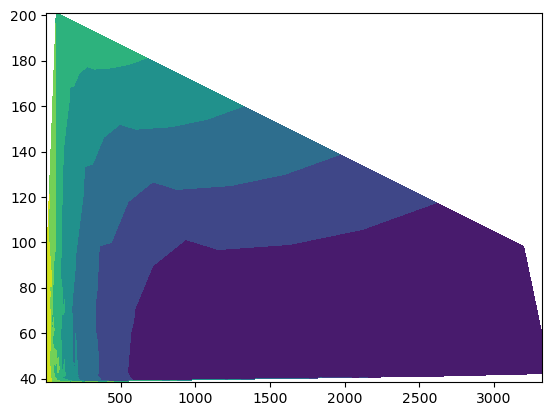

In [40]:
plt.tricontourf(Pressure, DOC, Temperature)
plt.show()